# Density of non-coding genetic sequences within protein coding genes 
**for the different species for which we have records in both proteins and protein coding genes** 

## Import python modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#
# init some data paths
working_on_extra_path  = "../../"
main_tables_path       = working_on_extra_path + "main_tables/"
working_on_tables_path = working_on_extra_path + "working_on_tables/"
# 

## The protein and protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

In [2]:
# statistics on length distribution for different species     
stat_file = main_tables_path + "stat_merged.tsv"
if 0:
    print("The statistical descriptions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
merged = pd.read_csv(stat_file, low_memory=False, sep="\t")
merged = merged[["genes_species", "merged_division_superregnum", "prots_superregnum", "tax_id", "prots_mean", "genes_mean"]] 
merged.rename(columns = {"merged_division_superregnum" : 'Clades'}, inplace = True)

# visualize data
print(merged.shape)
if 0:    
    pd.set_option('display.max_columns', None)
    display(merged.head(1))
    print("\nClades:\n", merged["Clades"].value_counts(), sep="")

(6519, 6)


## Python functions

In [3]:
# FUNCTIONS
###########            
def plot__rho_within_genes(df2plot, col_x, col_y, x_lab, y_lab, title): 
    # limits and tick-breaks
    x_limits = [400,200000] 
    y_limits = [-0.05, 1] 
    x_breaks = [400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
                20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 
                200000]
    
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.set_xscale('log', base=10)
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xticks(x_breaks)
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.set_title(title)
   
    colours = ['#D83B01', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']
    sns.scatterplot(data=df2plot, x=col_x, y=col_y, hue='Clades', sizes=(2), alpha=1., 
                    palette = colours)

    X_plot = np.linspace(min(df2plot[col_x].to_list()), max(df2plot[col_x].to_list()), 5000)
    Y_plot = np.where(X_plot <= 1500, 0, (1 - 3 * 500/ X_plot))    
    plt.plot(X_plot, Y_plot, color='black', linewidth=3)
    
    plt.legend(loc='lower right', title='Clades')
    plt.show()

## Density of non-coding genetic sequences within protein coding genes 

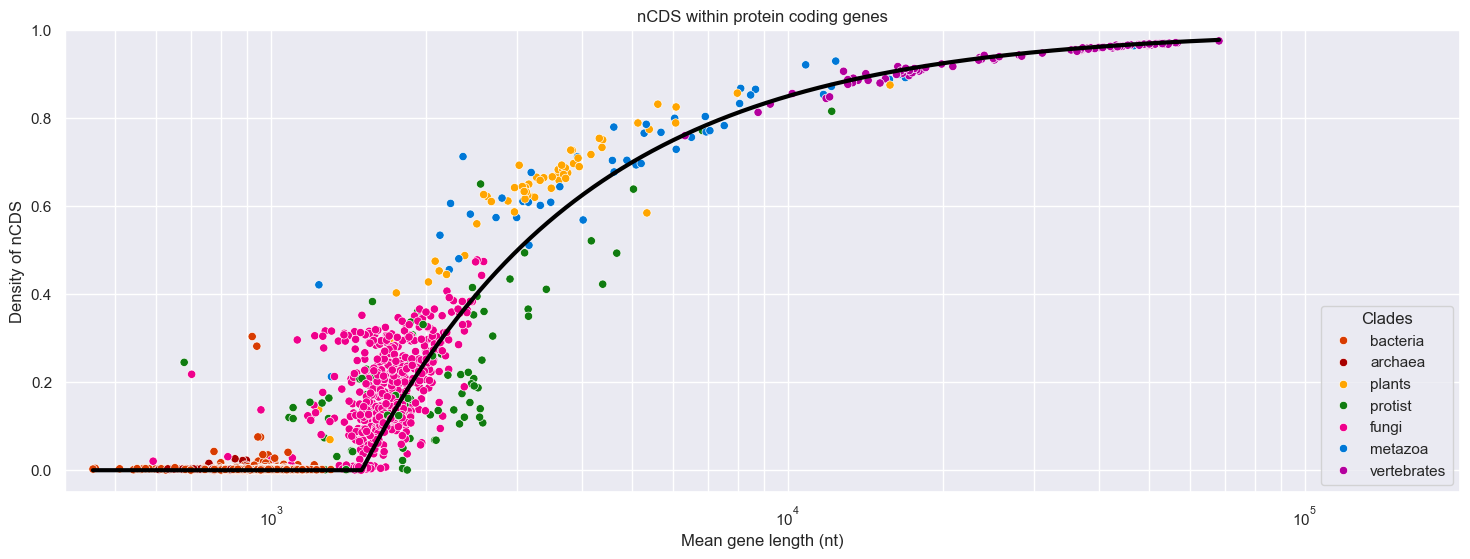

In [4]:
merged["rho"] = 1 - (3 * merged["prots_mean"] / merged["genes_mean"])
merged["theoretical"]  = np.where(merged["genes_mean"] <= 1500, 0, (1 - 3 * 500/ merged["genes_mean"]))

df2plot = merged
col_x = "genes_mean"
col_y = "rho"
legends_by = "Clades"
if 0:
    display(df2plot.head(2))
the_title = "nCDS within protein coding genes"
x_lab = "Mean gene length (nt)"
y_lab = "Density of nCDS"

plot__rho_within_genes(df2plot, col_x, col_y, x_lab, y_lab, the_title)

**Figure caption:**   
Each point represents the density of nCDS for the mean protein coding gene for an species for which we have records in both proteins and protein coding genes. The theoretical line describes the trend observed in these data, going from a regime in which the average size of the proteins grows proportionally to the average size of the genes, to another in which the size of the protein stabilizes in comparation with the protein coding gene length.

In [5]:
display(df2plot)

,genes_species,Clades,prots_superregnum,tax_id,prots_mean,genes_mean,rho,theoretical
0,archangium_gephyra_gca_001027285,bacteria,bacteria,48,367.499703,1103.871035,0.001243,0.0
1,chondromyces_crocatus_gca_001189295,bacteria,bacteria,52,403.466555,1211.514450,0.000920,0.0
2,nannocystis_exedens_gca_900112715,bacteria,bacteria,54,358.985125,1078.663863,0.001584,0.0
3,lysobacter_enzymogenes_gca_001442515,bacteria,bacteria,69,318.117519,955.797070,0.001511,0.0
4,stella_humosa_gca_003751345,bacteria,bacteria,94,332.257470,998.770749,0.002001,0.0
...,...,...,...,...,...,...,...,...
6514,rhodobacteraceae_bacterium_sh_1_gca_003008555,bacteria,bacteria,2605946,318.607411,958.938653,0.003250,0.0
6515,isoptericola_sp_pw21_gca_003244315,bacteria,bacteria,2607479,332.182111,998.542149,0.001999,0.0
6516,rhodospirillaceae_bacterium_gca_003344765,bacteria,bacteria,2661937,319.827559,961.226040,0.001814,0.0
6517,glaciihabitans_sp_rp_3_7_gca_004310685,bacteria,bacteria,2668039,329.057641,989.170912,0.002020,0.0


## Only for high quality genomes associated

### Retrieve high quality genomes

In [6]:
# Get well annotated eukarya genomes
highQ_df = pd.read_csv(working_on_tables_path + "stat_protCodGenes_with_ncbiGenomeData.tsv", 
                       low_memory=False, sep="\t") # tax_id, status, accession  
highQ_df = highQ_df[["species","assembly_status"]]
display(highQ_df.head(2))
display(highQ_df.columns)
good_status = ["Complete Genome", "Chromosome"] #It can be: ["Complete Genome", "Chromosome", "Scaffold", "Contig"]
# filter only to high Quality genomes
highQ_df = highQ_df[highQ_df['assembly_status'].isin(good_status)]
display(highQ_df.shape)

,species,assembly_status
0,methanobacterium_bryantii_gca_002287175,Contig
1,methanobacterium_formicicum_gca_000762265,Complete Genome


Index(['species', 'assembly_status'], dtype='object')

(5833, 2)

### Filter the merged set to those of high quality genomes

In [7]:
df2plot = df2plot[df2plot['genes_species'].isin(highQ_df["species"].tolist())]

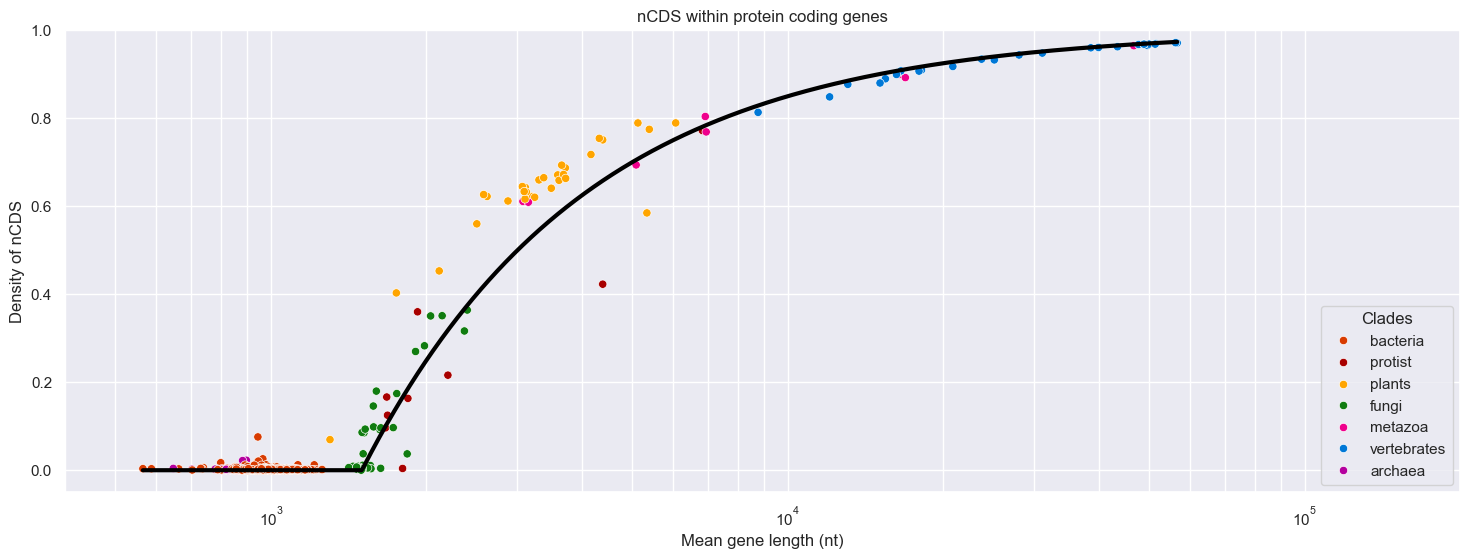

In [8]:
# Finally plot only the merged-high-quality genomes
plot__rho_within_genes(df2plot, col_x, col_y, x_lab, y_lab, the_title)